# Predict NPS on the basis of network KPIs

In order to achieve the best possible customer experience, companies need metrics that not only give insight into how they’re doing, but why, and how to improve. NPS - Network Promoter Score is a customer loyalty metric that is used to gauge the brand loyalty and customer satisfaction by asking how likely the customer is to recommend the organization to others.

____`Objective:`____Objective here is to have an estimation of poor Quality of Experience using Machine Learning and to find the actionable features. The final Outcomes can contain a gerelazied recommendation  


In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Read the train set data for KPI & NPS

In [195]:
data_train_kpi = pd.read_csv('kpi_data_to_share_train_raw.csv')

In [196]:
data_train_nps = pd.read_csv('nps_data_to_share_train.csv')

## 2. Explore the input data

____KPI Data____

In [197]:
data_train_kpi.head()

region  cluster  month  cell_name           start_time   kpi1  kpi2   kpi3  \
0       0       18      1       7369  2019-01-01 13:00:00  100.0  1.40  22.92   
1       0       18      1       7370  2019-01-01 23:00:00  100.0  4.63  62.46   
2       0       18      1       7371  2019-01-01 14:00:00  100.0  0.39   8.49   
3       0       18      1      10374  2019-01-01 21:00:00  100.0  1.82  11.15   
4       0       18      1      10375  2019-01-01 21:00:00  100.0  6.88  39.64   

      kpi4    kpi5    kpi6  kpi7  kpi8  kpi9  
0   7.3459  1.2523   99.77  0.03    31    10  
1   4.9972  0.9927  100.00  0.00    56    34  
2   6.2358  1.5523  100.00  0.00    20     4  
3  25.7297  1.9124  100.00  0.00    27    16  
4  18.0572  1.0602  100.00  0.00    64    45

### 2.1 Univariate Analysis of KPIs

In [198]:
def univaranalysis(data,col,hue=None):
    
    sns.set(style="darkgrid")
    
    fig, axis=plt.subplots(nrows =1,ncols=2,figsize=(12,5))
    axis[0].set_title("Density Plot")
    sns.distplot(data[col],ax=axis[0],bins=50)
    axis[1].set_title("Box Plot")
    sns.boxplot(data =data, x=col,ax=axis[1],orient='v')
    
    plt.show()

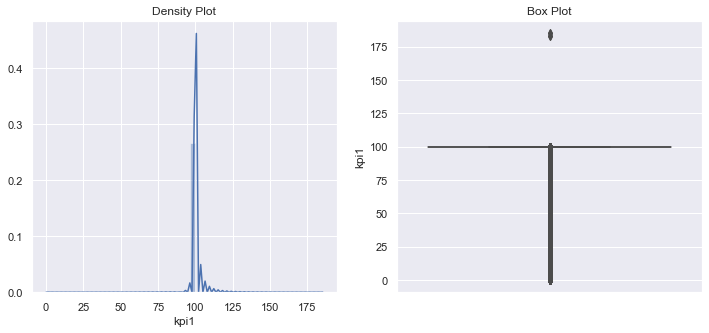

In [199]:
univaranalysis(data_train_kpi,'kpi1',hue=None)

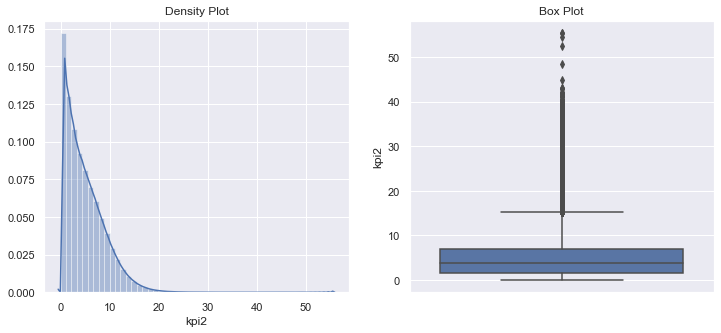

In [200]:
univaranalysis(data_train_kpi,'kpi2',hue=None)

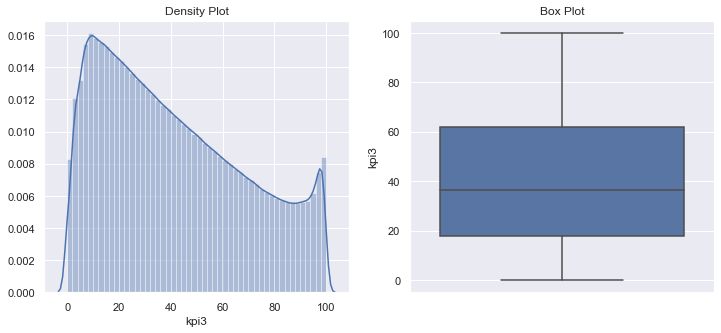

In [201]:
univaranalysis(data_train_kpi,'kpi3',hue=None)

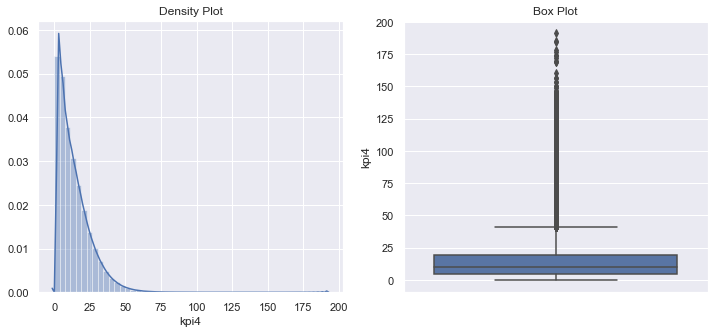

In [202]:
univaranalysis(data_train_kpi,'kpi4',hue=None)

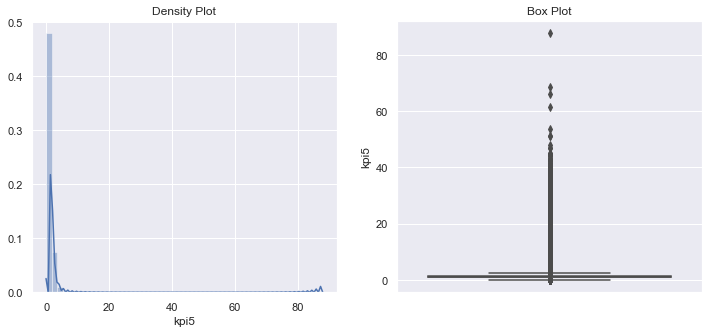

In [203]:
univaranalysis(data_train_kpi,'kpi5',hue=None)

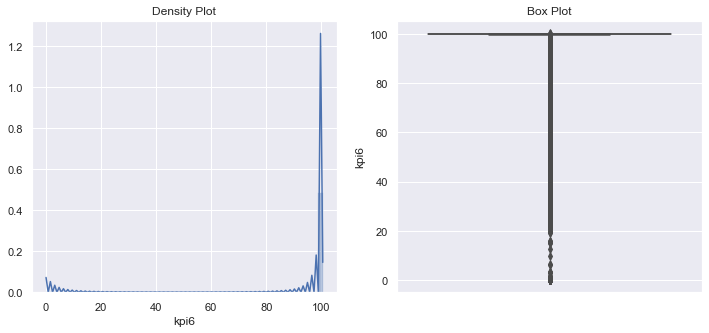

In [204]:
univaranalysis(data_train_kpi,'kpi6',hue=None)

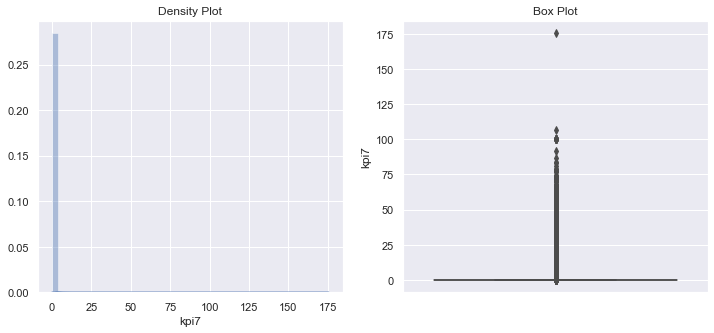

In [205]:
univaranalysis(data_train_kpi,'kpi7',hue=None)

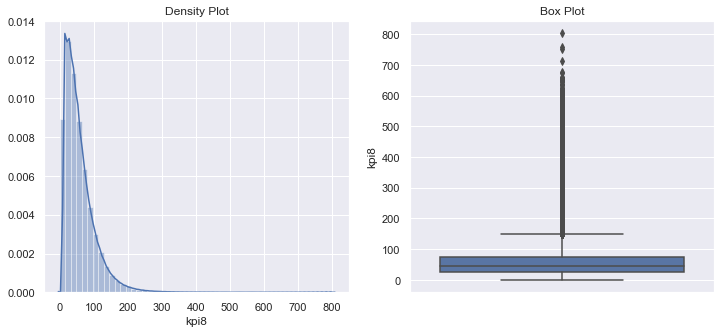

In [206]:
univaranalysis(data_train_kpi,'kpi8',hue=None)

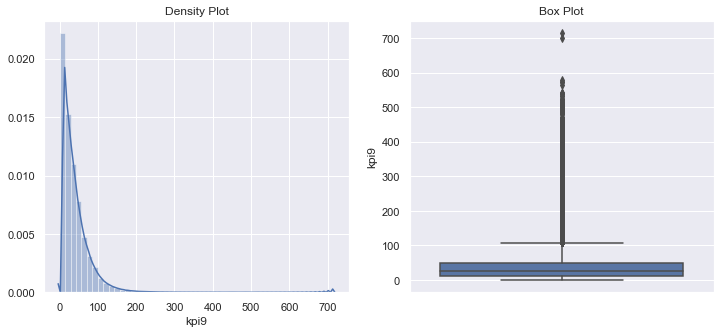

In [207]:
univaranalysis(data_train_kpi,'kpi9',hue=None)

### 2.2 MISSING VALUES

In [208]:
data_train_kpi.isnull().sum()

region        0
cluster       0
month         0
cell_name     0
start_time    0
kpi1          0
kpi2          0
kpi3          0
kpi4          0
kpi5          0
kpi6          0
kpi7          0
kpi8          0
kpi9          0
dtype: int64

In [209]:
data_train_kpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9950567 entries, 0 to 9950566
Data columns (total 14 columns):
region        int64
cluster       int64
month         int64
cell_name     int64
start_time    object
kpi1          float64
kpi2          float64
kpi3          float64
kpi4          float64
kpi5          float64
kpi6          float64
kpi7          float64
kpi8          int64
kpi9          int64
dtypes: float64(7), int64(6), object(1)
memory usage: 1.0+ GB


____NPS Data____

In [210]:
data_train_nps.shape

(1645, 4)

In [211]:
data_train_nps.head()

region  cluster  month  nps_values
0       2        0      1        0.31
1       2        1      1        0.14
2       2        2      1        0.22
3       2        3      1        0.29
4       2        4      1        0.24

NPS Data

In [212]:
data_train_nps.isnull().sum()

region        0
cluster       0
month         0
nps_values    0
dtype: int64

## 3. Merge the KPI data & NPS data

#### Create a Unique ID for NPS data set

In [213]:
data_train_nps['region'] = data_train_nps['region'].astype('str')
data_train_nps['cluster'] = data_train_nps['cluster'].astype('str')
data_train_nps['month'] = data_train_nps['month'].astype('str')
data_train_nps['unique_id'] = data_train_nps['region'] + "_" + data_train_nps['cluster'] + "_" + data_train_nps['month']

#### Create a Unique ID for KPI data set

In [214]:
data_train_kpi['region'] = data_train_kpi['region'].astype('str')
data_train_kpi['cluster'] = data_train_kpi['cluster'].astype('str')
data_train_kpi['month'] = data_train_kpi['month'].astype('str')
data_train_kpi['unique_id'] = data_train_kpi['region'] + "_" + data_train_kpi['cluster'] + "_" + data_train_kpi['month']

In [215]:
data_train_kpi_gb = data_train_kpi[['unique_id','kpi1','kpi2','kpi3','kpi4','kpi5','kpi6','kpi7','kpi8','kpi9']]

In [216]:
data_train_kpi_gb = data_train_kpi_gb.groupby('unique_id').mean()

In [217]:
data_train_kpi_gb.head(2)

kpi1      kpi2       kpi3       kpi4      kpi5       kpi6  \
unique_id                                                                   
0_14_1     98.391049  4.590491  40.838893  12.873357  1.693132  98.655634   
0_14_2     99.887795  5.513823  45.752390  13.442658  1.888151  99.922844   

               kpi7       kpi8       kpi9  
unique_id                                  
0_14_1     0.067267  55.418324  35.130214  
0_14_2     0.037315  51.503086  33.064815

In [218]:
data_train_kpi_gb.reset_index(inplace=True)

In [219]:
data_train_kpi_gb.head()

unique_id       kpi1      kpi2       kpi3       kpi4      kpi5       kpi6  \
0    0_14_1  98.391049  4.590491  40.838893  12.873357  1.693132  98.655634   
1    0_14_2  99.887795  5.513823  45.752390  13.442658  1.888151  99.922844   
2    0_14_3  99.979136  5.038871  44.963187  12.405383  1.346624  99.926313   
3    0_14_4  99.591537  5.057744  45.330780  12.450820  1.307083  99.926195   
4    0_14_5  99.403969  4.968502  45.212015  12.084204  1.311164  99.808544   

       kpi7       kpi8       kpi9  
0  0.067267  55.418324  35.130214  
1  0.037315  51.503086  33.064815  
2  0.036824  57.043779  37.031106  
3  0.042736  57.518699  37.449187  
4  0.108808  58.946360  37.118008

In [220]:
kpi_nps_merge = pd.merge(data_train_kpi_gb,data_train_nps[['unique_id','nps_values']],how='left',on='unique_id')

In [221]:
kpi_nps_merge.isnull().sum()

unique_id     0
kpi1          0
kpi2          0
kpi3          0
kpi4          0
kpi5          0
kpi6          0
kpi7          0
kpi8          0
kpi9          0
nps_values    0
dtype: int64

In [222]:
kpi_nps_merge.head()

unique_id       kpi1      kpi2       kpi3       kpi4      kpi5       kpi6  \
0    0_14_1  98.391049  4.590491  40.838893  12.873357  1.693132  98.655634   
1    0_14_2  99.887795  5.513823  45.752390  13.442658  1.888151  99.922844   
2    0_14_3  99.979136  5.038871  44.963187  12.405383  1.346624  99.926313   
3    0_14_4  99.591537  5.057744  45.330780  12.450820  1.307083  99.926195   
4    0_14_5  99.403969  4.968502  45.212015  12.084204  1.311164  99.808544   

       kpi7       kpi8       kpi9  nps_values  
0  0.067267  55.418324  35.130214        0.13  
1  0.037315  51.503086  33.064815        0.20  
2  0.036824  57.043779  37.031106       -0.12  
3  0.042736  57.518699  37.449187        0.05  
4  0.108808  58.946360  37.118008        0.11

In [223]:
target_map = lambda x: 1 if x <= 0.1 else 0

In [224]:
kpi_nps_merge['target'] = kpi_nps_merge['nps_values'].map(target_map)

In [225]:
kpi_nps_merge['target'].value_counts()

0    1141
1     504
Name: target, dtype: int64

In [226]:
kpi_nps_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1645 entries, 0 to 1644
Data columns (total 12 columns):
unique_id     1645 non-null object
kpi1          1645 non-null float64
kpi2          1645 non-null float64
kpi3          1645 non-null float64
kpi4          1645 non-null float64
kpi5          1645 non-null float64
kpi6          1645 non-null float64
kpi7          1645 non-null float64
kpi8          1645 non-null float64
kpi9          1645 non-null float64
nps_values    1645 non-null float64
target        1645 non-null int64
dtypes: float64(10), int64(1), object(1)
memory usage: 167.1+ KB


In [227]:
#kpi_nps_merge['start_time'] = pd.to_datetime(kpi_nps_merge['start_time'],errors = 'coerce')

### 3.1 Check the distribution of target output for each of the variables

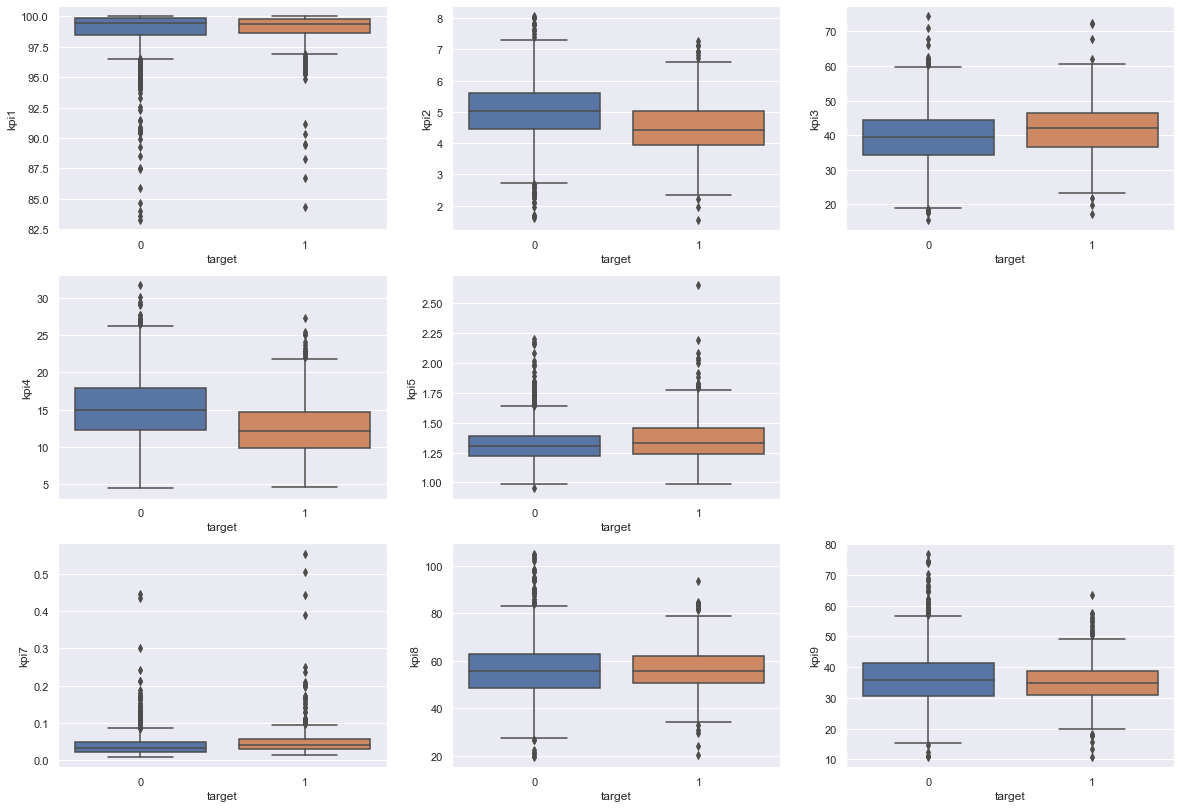

In [228]:
plt.figure(figsize=(20,14))
ax = plt.subplot(3,3,1)
sns.boxplot(data=kpi_nps_merge,y='kpi1',x='target')
ax = plt.subplot(3,3,2)
sns.boxplot(data=kpi_nps_merge,y='kpi2',x='target')
ax = plt.subplot(3,3,3)
sns.boxplot(data=kpi_nps_merge,y='kpi3',x='target')
ax = plt.subplot(3,3,4)
sns.boxplot(data=kpi_nps_merge,y='kpi4',x='target')
ax = plt.subplot(3,3,5)
sns.boxplot(data=kpi_nps_merge,y='kpi5',x='target')
#ax = plt.subplot(3,3,6)
#sns.boxplot(data=kpi_nps_merge,y='kpi6',x='target')
ax = plt.subplot(3,3,7)
sns.boxplot(data=kpi_nps_merge,y='kpi7',x='target')
ax = plt.subplot(3,3,8)
sns.boxplot(data=kpi_nps_merge,y='kpi8',x='target')
ax = plt.subplot(3,3,9)
sns.boxplot(data=kpi_nps_merge,y='kpi9',x='target')

### 3.2 Remove the outliers and examine each of the variables closely

#### KPI1 - `'eric_cell_availiability_digi'`

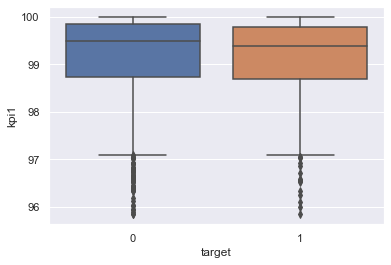

In [229]:
plt.figure(figsize=(6,4))
# Check the outliers 
a = kpi_nps_merge['kpi1'].quantile(0.999)
b = kpi_nps_merge['kpi1'].quantile(0.05)
temp = kpi_nps_merge[(kpi_nps_merge['kpi1'] < a) & (kpi_nps_merge['kpi1'] > b) ]
sns.boxplot(data=temp,y='kpi1',x='target')

#### KPI2 - `'total_data_vol_gb'`

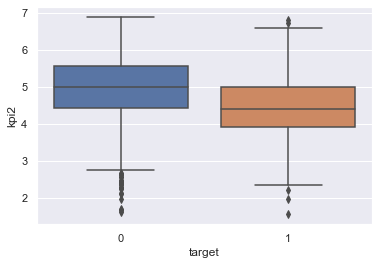

In [230]:
# Check the outliers 
a = kpi_nps_merge['kpi2'].quantile(0.98)
b = kpi_nps_merge['kpi1'].quantile(0.05)
temp = kpi_nps_merge[(kpi_nps_merge['kpi2'] < a)]
sns.boxplot(data=temp,y='kpi2',x='target')

#### KPI3 - `'eric_prb_utilzation_rate'`

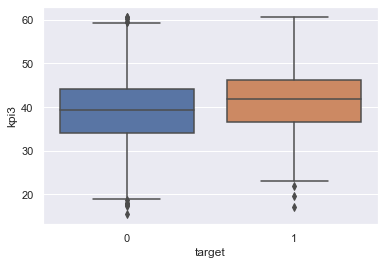

In [231]:
# Check the outliers 
a = kpi_nps_merge['kpi3'].quantile(0.99)
b = kpi_nps_merge['kpi1'].quantile(0.05)
temp = kpi_nps_merge[(kpi_nps_merge['kpi3'] < a)]
sns.boxplot(data=temp,y='kpi3',x='target')

#### KPI4 - `'eric_dl_user_ip_thpt'`

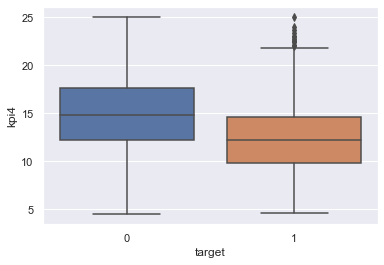

In [232]:
# Check the outliers 
a = kpi_nps_merge['kpi4'].quantile(0.98)
b = kpi_nps_merge['kpi1'].quantile(0.05)
temp = kpi_nps_merge[(kpi_nps_merge['kpi4'] < a)]
sns.boxplot(data=temp,y='kpi4',x='target')

#### KPI5 - `'eric_ul_user_thpt'`

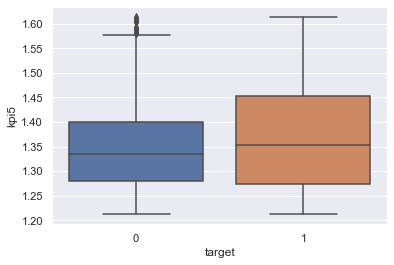

In [233]:
# Check the outliers 
a = kpi_nps_merge['kpi5'].quantile(0.95)
b = kpi_nps_merge['kpi5'].quantile(0.2)
temp = kpi_nps_merge[(kpi_nps_merge['kpi5'] < a) & (kpi_nps_merge['kpi5'] > b)]
sns.boxplot(data=temp,y='kpi5',x='target')

#### KPI6 - `'eric_erab_sucees_rate'`

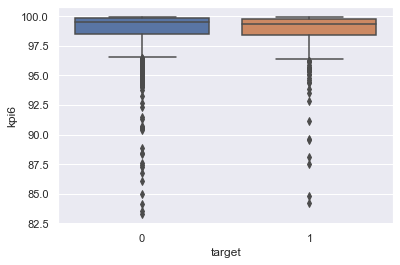

In [234]:
# Check the outliers 
a = kpi_nps_merge['kpi6'].quantile(0.98)
#b = kpi_nps_merge['kpi6'].quantile(0.05)
temp = kpi_nps_merge[(kpi_nps_merge['kpi6'] < a)]
sns.boxplot(data=temp,y='kpi6',x='target')

#### KPI7 - `'eric_ps_drop_rate_eutran'`

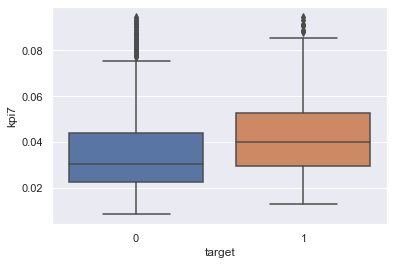

In [235]:
# Check the outliers 
a = kpi_nps_merge['kpi7'].quantile(0.94)
#b = kpi_nps_merge['kpi1'].quantile(0.5)
temp = kpi_nps_merge[(kpi_nps_merge['kpi7'] < a)]
sns.boxplot(data=temp,y='kpi7',x='target')

#### KPI8 - `'eric_maximum_number_of_rrc_connection_user'`

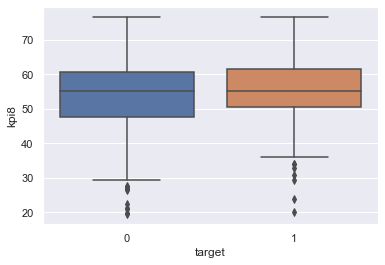

In [236]:
# Check the outliers 
a = kpi_nps_merge['kpi8'].quantile(0.95)
#b = kpi_nps_merge['kpi1'].quantile(0.5)
temp = kpi_nps_merge[(kpi_nps_merge['kpi8'] < a)]
sns.boxplot(data=temp,y='kpi8',x='target')

#### KPI9 - `'eric_mean_number_of_rrc_connection_user'`

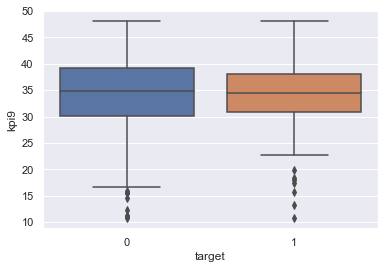

In [237]:
# Check the outliers 
a = kpi_nps_merge['kpi9'].quantile(0.92)
#b = kpi_nps_merge['kpi1'].quantile(0.5)
temp = kpi_nps_merge[(kpi_nps_merge['kpi9'] < a)]
sns.boxplot(data=temp,y='kpi9',x='target')

In [238]:
#del data_train_kpi, data_train_nps

In [239]:
kpi_nps_merge.head()

unique_id       kpi1      kpi2       kpi3       kpi4      kpi5       kpi6  \
0    0_14_1  98.391049  4.590491  40.838893  12.873357  1.693132  98.655634   
1    0_14_2  99.887795  5.513823  45.752390  13.442658  1.888151  99.922844   
2    0_14_3  99.979136  5.038871  44.963187  12.405383  1.346624  99.926313   
3    0_14_4  99.591537  5.057744  45.330780  12.450820  1.307083  99.926195   
4    0_14_5  99.403969  4.968502  45.212015  12.084204  1.311164  99.808544   

       kpi7       kpi8       kpi9  nps_values  target  
0  0.067267  55.418324  35.130214        0.13       0  
1  0.037315  51.503086  33.064815        0.20       0  
2  0.036824  57.043779  37.031106       -0.12       1  
3  0.042736  57.518699  37.449187        0.05       1  
4  0.108808  58.946360  37.118008        0.11       0

In [240]:
kpi_nps = kpi_nps_merge

In [241]:
kpi_nps.drop(['unique_id','nps_values'],axis=1,inplace=True)

In [242]:
kpi_nps.head()

kpi1      kpi2       kpi3       kpi4      kpi5       kpi6      kpi7  \
0  98.391049  4.590491  40.838893  12.873357  1.693132  98.655634  0.067267   
1  99.887795  5.513823  45.752390  13.442658  1.888151  99.922844  0.037315   
2  99.979136  5.038871  44.963187  12.405383  1.346624  99.926313  0.036824   
3  99.591537  5.057744  45.330780  12.450820  1.307083  99.926195  0.042736   
4  99.403969  4.968502  45.212015  12.084204  1.311164  99.808544  0.108808   

        kpi8       kpi9  target  
0  55.418324  35.130214       0  
1  51.503086  33.064815       0  
2  57.043779  37.031106       1  
3  57.518699  37.449187       1  
4  58.946360  37.118008       0

In [243]:
X_train = kpi_nps.drop(['target'],axis=1)

In [244]:
Y_train = kpi_nps_merge['target']

In [245]:
X_train.columns

Index(['kpi1', 'kpi2', 'kpi3', 'kpi4', 'kpi5', 'kpi6', 'kpi7', 'kpi8', 'kpi9'], dtype='object')

____Check for collinearity____

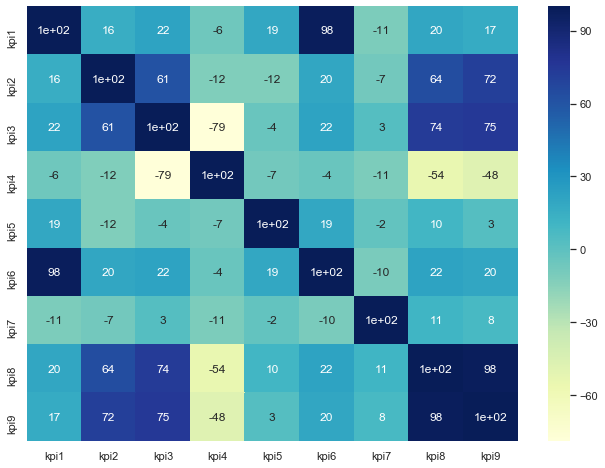

In [246]:
plt.figure(figsize=(11,8))
sns.heatmap(round(X_train.corr()*100,0),annot=True,cmap="YlGnBu")
plt.show()

### 3. Scaling & Standardization

In [247]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [248]:
scaler = StandardScaler()

In [249]:
X_train_scaled = scaler.fit_transform(X_train)

In [250]:
X_train_scaled = pd.DataFrame(X_train_scaled)

In [251]:
X_train_scaled.head()

0         1         2         3         4         5         6  \
0 -0.240943 -0.282627  0.079834 -0.387256  2.133868 -0.078000  0.560359   
1  0.590667  0.660663  0.676296 -0.253816  3.302515  0.596063 -0.191297   
2  0.641417  0.175445  0.580493 -0.496946  0.057417  0.597909 -0.203611   
3  0.426062  0.194726  0.625116 -0.486296 -0.179531  0.597846 -0.055257   
4  0.321848  0.103555  0.610699 -0.572228 -0.155077  0.535264  1.602845   

          7         8  
0 -0.071763 -0.115557  
1 -0.406181 -0.357880  
2  0.067075  0.107465  
3  0.107640  0.156516  
4  0.229583  0.117660

In [252]:
X_train.columns=['kpi1','kpi2','kpi3','kpi4','kpi5','kpi6','kpi7','kpi8','kpi9']

In [253]:
X_train.head()

kpi1      kpi2       kpi3       kpi4      kpi5       kpi6      kpi7  \
0  98.391049  4.590491  40.838893  12.873357  1.693132  98.655634  0.067267   
1  99.887795  5.513823  45.752390  13.442658  1.888151  99.922844  0.037315   
2  99.979136  5.038871  44.963187  12.405383  1.346624  99.926313  0.036824   
3  99.591537  5.057744  45.330780  12.450820  1.307083  99.926195  0.042736   
4  99.403969  4.968502  45.212015  12.084204  1.311164  99.808544  0.108808   

        kpi8       kpi9  
0  55.418324  35.130214  
1  51.503086  33.064815  
2  57.043779  37.031106  
3  57.518699  37.449187  
4  58.946360  37.118008

In [254]:
X_train.to_csv('train.csv')

In [255]:
Y_train.to_csv('y_train.csv')

### 4. Perform PCA on the scaled data

In [256]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(random_state=42)
pca.fit(X_train_scaled)
print(pca.explained_variance_ratio_)

[0.42025251 0.21425276 0.12517008 0.10329695 0.09271298 0.03513704
 0.00576329 0.00256271 0.00085167]


In [257]:
var_cummulative = np.cumsum(pca.explained_variance_ratio_)

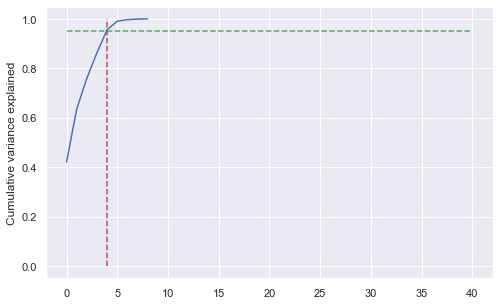

In [258]:
fig = plt.figure(figsize=[8,5])
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=40, xmin=0, colors="g", linestyles="--")
plt.plot(var_cummulative)
plt.ylabel("Cumulative variance explained")
plt.show()

In [259]:
from sklearn.decomposition import IncrementalPCA

In [260]:
pca_final = IncrementalPCA(n_components=4)

In [261]:
df_pca = pca_final.fit_transform(X_train_scaled)

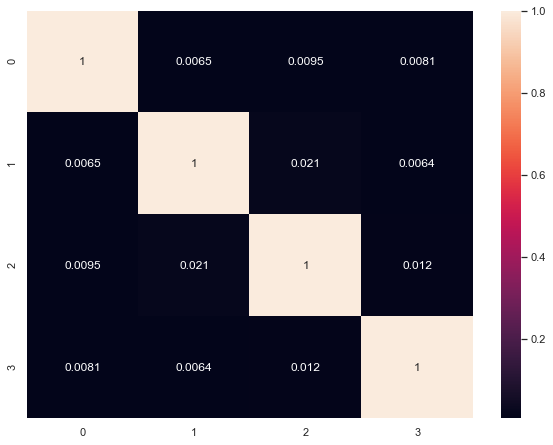

In [262]:
corrmat = np.corrcoef(df_pca.transpose())
plt.figure(figsize=[10,7.5])
sns.heatmap(corrmat, annot=True)

In [263]:
print(pca_final.explained_variance_ratio_)

[0.41778515 0.20952053 0.12063327 0.09485281]


In [264]:
df_pca = pd.DataFrame(df_pca)

In [265]:
df_pca.columns = ['PC1','PC2','PC3','PC4']

In [266]:
df_pca.head()

PC1       PC2       PC3       PC4
0 -0.029624  0.077947  1.700061  1.341423
1  0.590936  1.428242  1.471526  2.118282
2  0.823540  0.619131  0.081148 -0.347214
3  0.847536  0.390249  0.026095 -0.509981
4  0.897784 -0.026723  1.162835 -0.942861

In [267]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
#logsk.fit(X_train[col], y_train)
logsk.fit(df_pca, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [268]:
# Predicted probabilities
y_pred = logsk.predict_proba(df_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

1
0  0.492185
1  0.359575
2  0.322357
3  0.329648
4  0.594254

In [269]:
y_pred_1 = pd.concat([y_pred_1,Y_train],axis=1)

In [270]:
y_pred_1.head()

1  target
0  0.492185       0
1  0.359575       0
2  0.322357       1
3  0.329648       1
4  0.594254       0

In [271]:
y_pred_1.rename(columns={1:'Conversion_Prob'},inplace=True)
y_pred_1.head()

Conversion_Prob  target
0         0.492185       0
1         0.359575       0
2         0.322357       1
3         0.329648       1
4         0.594254       0

In [272]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for i in num:
    y_pred_1['predicted'] = y_pred_1.Conversion_Prob.map( lambda x: 1 if x > i else 0)
    cm1 = metrics.confusion_matrix(y_pred_1.target, y_pred_1.predicted)
                                   
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
                                   
print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.339818  0.990079  0.052585
0.2   0.2  0.534954  0.861111  0.390885
0.3   0.3  0.699696  0.706349  0.696757
0.4   0.4  0.737994  0.486111  0.849255
0.5   0.5  0.725836  0.283730  0.921122
0.6   0.6  0.699696  0.097222  0.965819
0.7   0.7  0.694833  0.035714  0.985977
0.8   0.8  0.695441  0.023810  0.992112
0.9   0.9  0.694833  0.011905  0.996494
1.0   1.0  0.693617  0.000000  1.000000


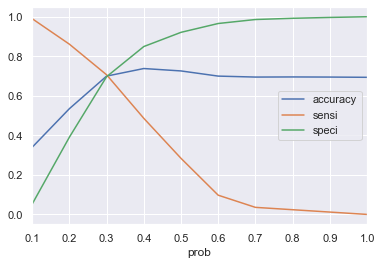

In [273]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [274]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_1['predicted'] = y_pred_1.Conversion_Prob.map( lambda x: 1 if x >= 0.35 else 0)
#y_final.Converted = y_final.Converted.astype('int64')
# Let's see the head
y_pred_1.head()

Conversion_Prob  target  predicted
0         0.492185       0          1
1         0.359575       0          1
2         0.322357       1          0
3         0.329648       1          0
4         0.594254       0          1

In [275]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_1.target, y_pred_1.predicted )
confusion

array([[899, 242],
       [205, 299]], dtype=int64)

In [276]:
metrics.accuracy_score(y_pred_1.target, y_pred_1.predicted)

0.7282674772036474

In [301]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Fig Logistic Regression AUC')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

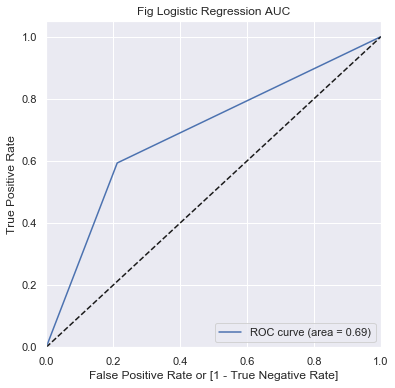

(array([0.        , 0.21209465, 1.        ]),
 array([0.        , 0.59325397, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [302]:
draw_roc(y_pred_1.target, y_pred_1.predicted)

In [279]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [280]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [4, 5,8]
        }

# Note that we've used RandmizedSearchCV and StratifiedKFold for finding the optimum parameters.
xgb = XGBClassifier(learning_rate=0.02, n_estimators=1000, 
                    objective='binary:logistic',silent=True, nthread=1,scale_pos_weight=10)

folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='recall',
                                   n_jobs=4, cv=skf.split(X_train, Y_train), verbose=3, random_state=1001 )

In [281]:
### Please set the cell to code for execution

random_search.fit(X_train, Y_train)
print('We can get Recall of',random_search.best_score_,'using',random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   35.8s finished


We can get Recall of 0.8372426494929128 using {'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 4, 'gamma': 5, 'colsample_bytree': 1.0}


In [282]:
# Running XGBoost with the optimum parameters

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1,subsample=1, min_child_weight=5, max_depth= 4,
                    gamma= 5, colsample_bytree= 1,scale_pos_weight=10)

xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5,
              learning_rate=0.02, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, seed=None,
              silent=True, subsample=1, verbosity=1)

In [283]:
from sklearn import linear_model, metrics
from sklearn.metrics import roc_auc_score
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
y_pred_xg=xgb.predict(X_train)

confusion_xgboost = metrics.confusion_matrix( Y_train,y_pred_xg)
TP = confusion_xgboost[1,1] # true positive 
TN = confusion_xgboost[0,0] # true negatives
FP = confusion_xgboost[0,1] # false positives
FN = confusion_xgboost[1,0] # false negatives

printmd('**Test Set Results**')
printmd('**Sensitivity, TPR or Recall {:.3f} %**'.format(100*TP/(TP+FN)))
printmd('**Specitivity {:.3f} %**'.format(100*TN/(TN+FP)))
printmd('**FPR {:.3f} %**'.format(100*FP/ float(TN+FP)))
printmd('**Precision {:.3f} %**'.format(100*TP/(TP+FP)))
printmd('**Accuracy {:.3f} %**'.format(100*(TP+TN)/(TP+FP+TN+FN)))

# We Store These Results for comparison later
results5=[100*TP/(TP+FN),100*TN/(TN+FP),100*FP/(TN+FP),100*TP/(TP+FP),100*(TP+TN)/(TP+FP+TN+FN)]

**Test Set Results**

**Sensitivity, TPR or Recall 100.000 %**

**Specitivity 57.143 %**

**FPR 42.857 %**

**Precision 50.755 %**

**Accuracy 70.274 %**

In [284]:
xgboost_final_proba=xgb.predict_proba(X_train)[:, 1]

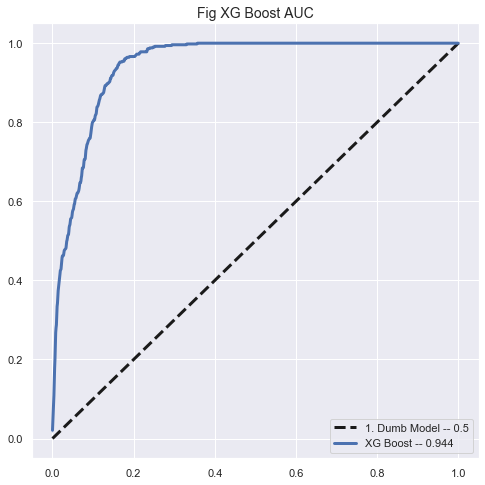

In [285]:
fig8,ax8 = plt.subplots(1,1,figsize=(8,8))
ax8.set_title('Fig XG Boost AUC', fontsize=14)

# We use this function to deduce fpr,tpr, auc_score for all models
def draw_roc2( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    
    return fpr,tpr,round(auc_score,3)

ax8 = sns.lineplot(x=[0,1], y=[0,1],label='1. Dumb Model -- 0.5',linewidth= 3,color='k')
ax8.lines[0].set_linestyle("--")

fpr,tpr,auc_score=draw_roc2(Y_train,xgboost_final_proba)
ax8 = sns.lineplot(x=fpr, y=tpr,label='XG Boost -- {:.3f}'.format(auc_score),linewidth= 3)

## Import the Test Set

In [286]:
test_df = pd.read_csv('kpi_data_to_share_test_raw.csv')

In [287]:
test_df.head()

region  cluster  month  cell_name           start_time   kpi1  kpi2   kpi3  \
0       0       18      8      10393  2019-08-01 23:00:00  100.0  8.83  97.06   
1       0       18      8       5150  2019-08-01 18:00:00  100.0  3.53  63.49   
2       0       18      8       3258  2019-08-01 13:00:00  100.0  1.87  19.54   
3       0       18      8      21065  2019-08-01 22:00:00  100.0  5.49  57.76   
4       0       18      8      12282  2019-08-01 21:00:00  100.0  9.57  73.27   

      kpi4    kpi5    kpi6  kpi7  kpi8  kpi9  
0   7.5226  0.9201   99.89  1.27    34    17  
1   3.9283  0.9216   99.95  0.07    68    39  
2  12.0065  1.4740   99.81  0.02    33    17  
3   7.8838  1.1642  100.00  0.02    43    26  
4   7.9044  0.7635   99.96  0.04    86    58

In [288]:
test_df['region'] = test_df['region'].astype('str')
test_df['cluster'] = test_df['cluster'].astype('str')
test_df['month'] = test_df['month'].astype('str')
test_df['unique_id'] = test_df['region'] + "_" + test_df['cluster'] + "_" + test_df['month']

In [289]:
test_df.columns

Index(['region', 'cluster', 'month', 'cell_name', 'start_time', 'kpi1', 'kpi2',
       'kpi3', 'kpi4', 'kpi5', 'kpi6', 'kpi7', 'kpi8', 'kpi9', 'unique_id'],
      dtype='object')

In [290]:
test = test_df[['kpi1', 'kpi2','kpi3', 'kpi4', 'kpi5', 'kpi6', 'kpi7', 'kpi8', 'kpi9', 'unique_id']]

In [291]:
test_groupby = test.groupby('unique_id').mean()

In [292]:
test_groupby.head()

kpi1      kpi2       kpi3       kpi4      kpi5       kpi6  \
unique_id                                                                   
0_14_8     99.322960  5.695083  51.733415  11.044358  1.312968  99.620924   
0_14_9     99.884917  5.790710  49.107938  12.098234  1.307058  99.925112   
0_15_8     99.604511  4.423194  38.622119  15.100849  1.623675  98.488324   
0_15_9     99.667126  4.682074  37.188952  16.116352  1.632904  98.505981   
0_16_8     98.994867  4.468107  50.707224   8.160307  1.353699  98.934609   

               kpi7       kpi8       kpi9  
unique_id                                  
0_14_8     0.055552  58.846732  38.121337  
0_14_9     0.052384  59.079348  38.474275  
0_15_8     0.075650  51.748586  31.830033  
0_15_9     0.059521  53.781887  33.352752  
0_16_8     0.058083  55.021568  34.471174

In [293]:
Test_Set=test_groupby.reset_index()

In [294]:
Test_Set.drop('unique_id',axis=1,inplace=True)

In [295]:
Test_Set

kpi1      kpi2       kpi3       kpi4      kpi5       kpi6      kpi7  \
0    99.322960  5.695083  51.733415  11.044358  1.312968  99.620924  0.055552   
1    99.884917  5.790710  49.107938  12.098234  1.307058  99.925112  0.052384   
2    99.604511  4.423194  38.622119  15.100849  1.623675  98.488324  0.075650   
3    99.667126  4.682074  37.188952  16.116352  1.632904  98.505981  0.059521   
4    98.994867  4.468107  50.707224   8.160307  1.353699  98.934609  0.058083   
..         ...       ...        ...        ...       ...        ...       ...   
465  99.972067  4.915511  25.474167  25.954365  1.277076  99.952178  0.026900   
466  99.849839  6.023461  36.908236  20.170857  1.204939  99.902454  0.026563   
467  99.906530  6.010599  36.619355  20.128216  1.200677  99.905328  0.022275   
468  99.810549  6.068280  44.137776  14.601613  1.279921  99.904246  0.026890   
469  99.858502  6.216254  44.864360  14.655081  1.276106  99.913623  0.025990   

          kpi8       kpi9  
0    58.846732  38.121337  
1    59.079348  38.474275  
2    51.748586  31.830033  
3    53.781887  33.352752  
4    55.021568  34.471174  
..         ...        ...  
465  44.115556  28.076667  
466  54.709677  35.108270  
467  54.582624  35.296809  
468  60.875984  37.549606  
469  61.153542  38.180625  

[470 rows x 9 columns]

In [296]:
final_predictions=xgb.predict(Test_Set)

In [297]:
final_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,

In [298]:
test_groupby.reset_index(inplace=True)

In [299]:
test_groupby['Predictions']=final_predictions

In [300]:
test_groupby

unique_id       kpi1      kpi2       kpi3       kpi4      kpi5       kpi6  \
0      0_14_8  99.322960  5.695083  51.733415  11.044358  1.312968  99.620924   
1      0_14_9  99.884917  5.790710  49.107938  12.098234  1.307058  99.925112   
2      0_15_8  99.604511  4.423194  38.622119  15.100849  1.623675  98.488324   
3      0_15_9  99.667126  4.682074  37.188952  16.116352  1.632904  98.505981   
4      0_16_8  98.994867  4.468107  50.707224   8.160307  1.353699  98.934609   
..        ...        ...       ...        ...        ...       ...        ...   
465    5_97_9  99.972067  4.915511  25.474167  25.954365  1.277076  99.952178   
466    5_98_8  99.849839  6.023461  36.908236  20.170857  1.204939  99.902454   
467    5_98_9  99.906530  6.010599  36.619355  20.128216  1.200677  99.905328   
468    5_99_8  99.810549  6.068280  44.137776  14.601613  1.279921  99.904246   
469    5_99_9  99.858502  6.216254  44.864360  14.655081  1.276106  99.913623   

         kpi7       kpi8       kpi9  Predictions  
0    0.055552  58.846732  38.121337            1  
1    0.052384  59.079348  38.474275            1  
2    0.075650  51.748586  31.830033            1  
3    0.059521  53.781887  33.352752            1  
4    0.058083  55.021568  34.471174            1  
..        ...        ...        ...          ...  
465  0.026900  44.115556  28.076667            0  
466  0.026563  54.709677  35.108270            0  
467  0.022275  54.582624  35.296809            0  
468  0.026890  60.875984  37.549606            1  
469  0.025990  61.153542  38.180625            1  

[470 rows x 11 columns]

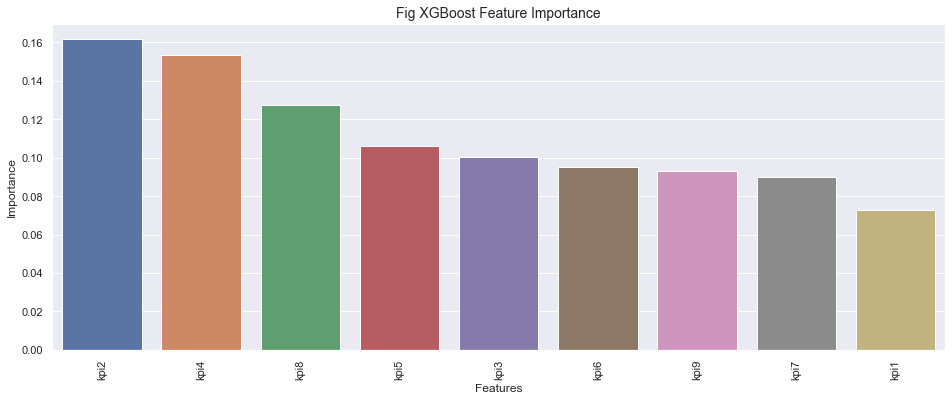

In [305]:
my_features=pd.DataFrame({'Features':X_train.columns,'Importance':xgb.feature_importances_})
my_features.sort_values(by='Importance',ascending=False,inplace=True)

fig7,ax7 = plt.subplots(1,1,figsize=(16,6))
ax7.set_title('Fig XGBoost Feature Importance', fontsize=14)
ax7 = sns.barplot(x="Features", y="Importance", data=my_features)
for tick in ax7.get_xticklabels():
    tick.set_rotation(90)